In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

###`Q 1-3` Using the 'diamonds' dataset - sns.load_dataset('diamonds')
1. Create a violinplot of 'price' grouped by 'cut'.
2. Create regplot on `carat` vs `price`. and give hue on 'cut'
3. Create boxplot on 'color' and 'price'

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


<Axes: xlabel='cut', ylabel='price'>

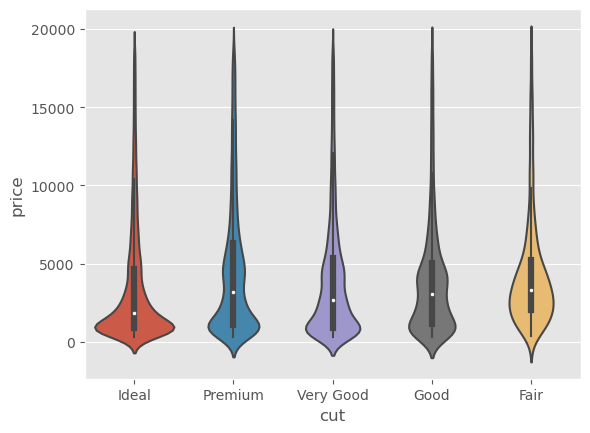

In [7]:
sns.violinplot(diamonds,y ='price', x = 'cut')

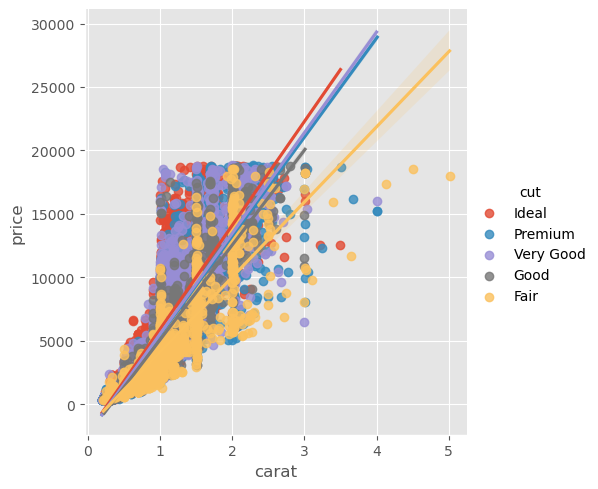

In [10]:
sns.lmplot(diamonds,x = 'carat',y = 'price',hue = 'cut')

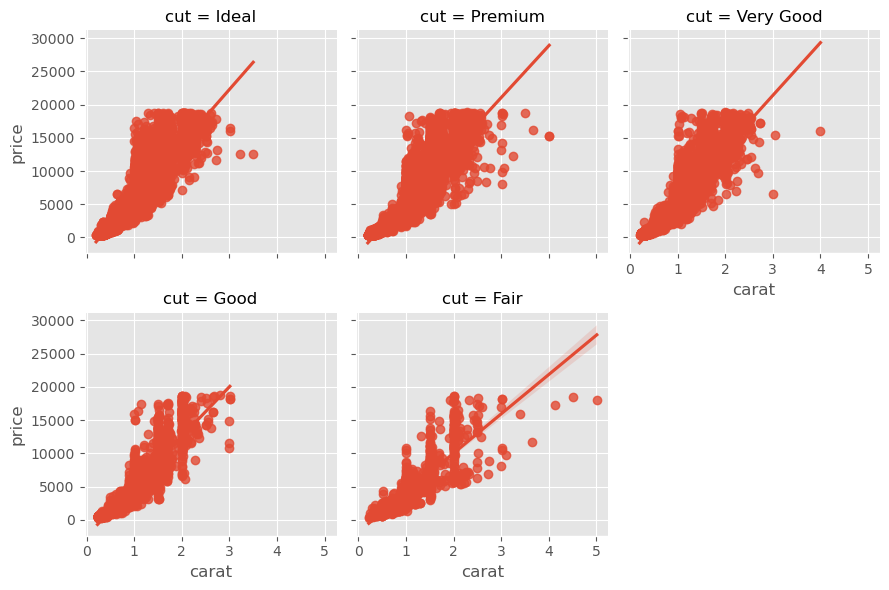

In [15]:
g = sns.FacetGrid(diamonds,col='cut',col_wrap=3)
g.map(sns.regplot,'carat','price')

<Axes: xlabel='color', ylabel='price'>

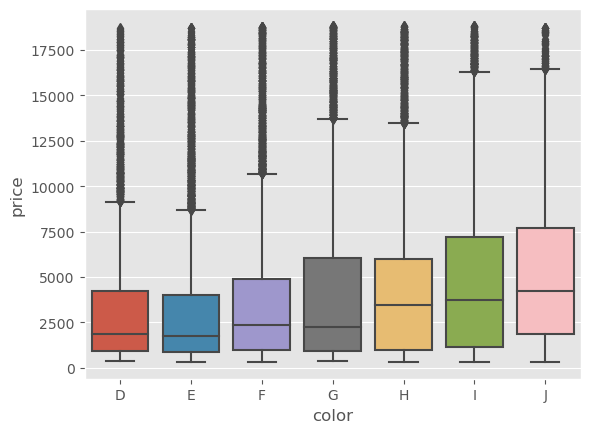

In [16]:
sns.boxplot(diamonds,x = 'color',y = 'price')

###`Q 4` Using the 'Taxis' dataset - sns.load_dataset('taxis')
4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.

4.2. Create a regression plot on time of ride  vs total fare. You will need to calculate ride time using pickup and dropoff column.

4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

In [19]:
taxis = sns.load_dataset('taxis')
print(taxis.shape)
taxis.head(3)

(6433, 14)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


<Axes: xlabel='payment', ylabel='total'>

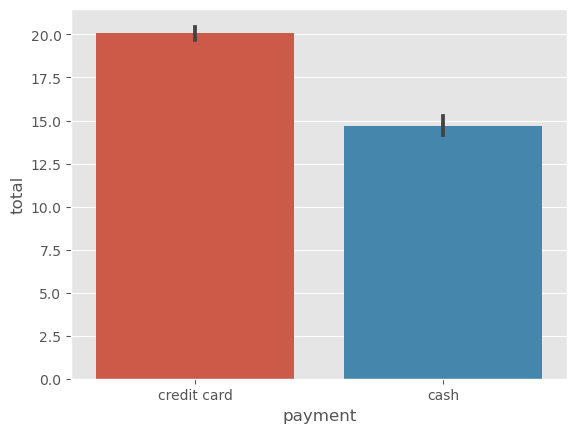

In [20]:
sns.barplot(taxis,x = 'payment',y = 'total')

In [21]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])
taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])

In [27]:
taxis['ride_time'] = taxis['dropoff'] - taxis['pickup']
taxis['ride_time'] = taxis['ride_time'].astype('timedelta64[m]')
taxis.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ride_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.0


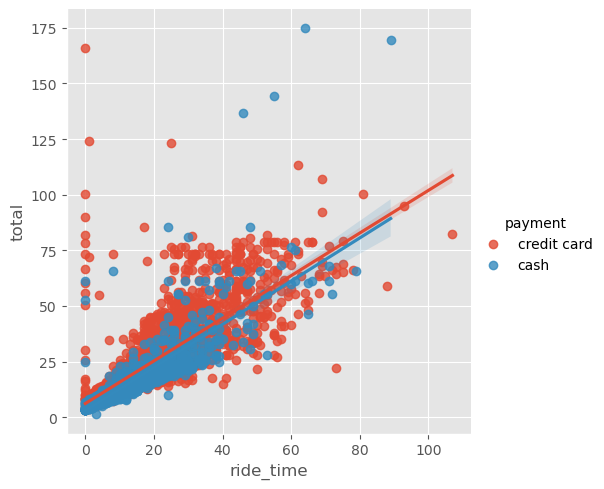

In [29]:
sns.lmplot(taxis,x='ride_time',y='total',hue = 'payment')

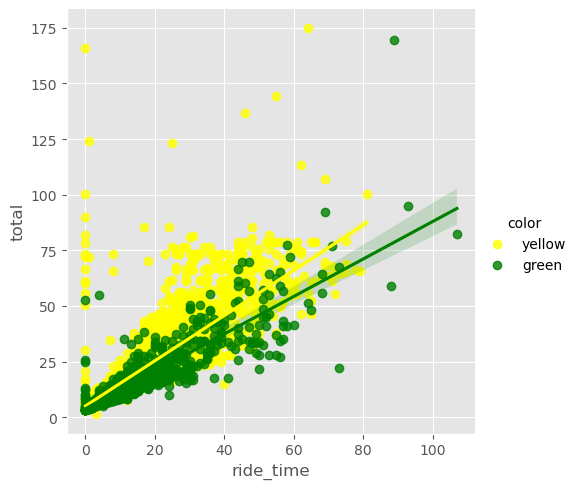

In [32]:
sns.lmplot(taxis,x='ride_time',y='total',hue = 'color',palette={'yellow':'yellow','green':'green'})

## Problem 5-12:

### **`Problem 5:`** Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

In [33]:
insurance = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
insurance.head(3)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94


<Axes: xlabel='gender', ylabel='bloodpressure'>

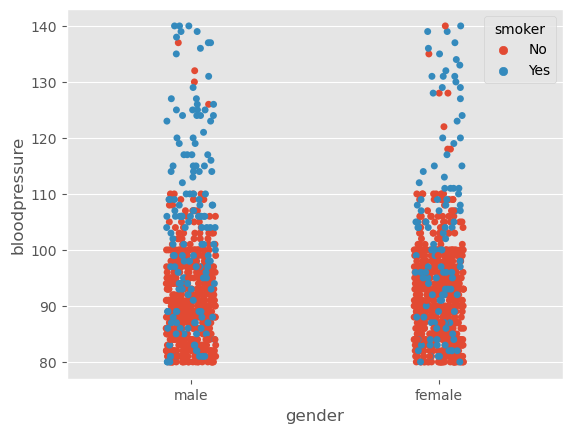

In [34]:
sns.stripplot(insurance,x = 'gender',y = 'bloodpressure',hue = 'smoker')

<Axes: xlabel='gender', ylabel='bloodpressure'>

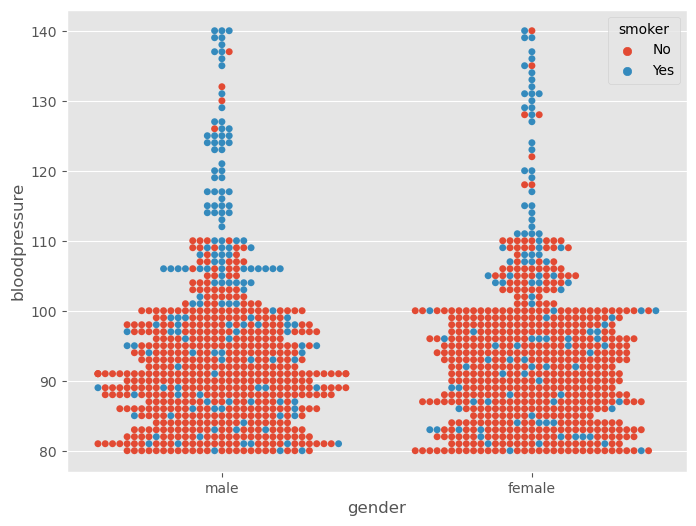

In [37]:
plt.figure(figsize = (8,6))
sns.swarmplot(insurance,x = 'gender',y = 'bloodpressure',hue = 'smoker',s = 5)

### **`Problem 6:`** Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

<Axes: xlabel='region', ylabel='bmi'>

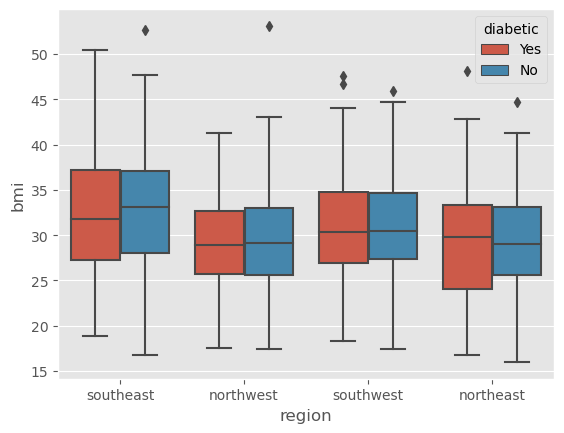

In [39]:
sns.boxplot(insurance,x = 'region',y = 'bmi',hue = 'diabetic')

<Axes: xlabel='region', ylabel='bmi'>

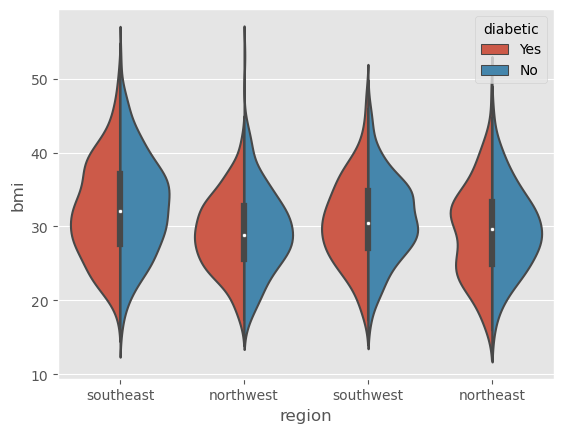

In [42]:
sns.violinplot(insurance,x = 'region',y = 'bmi',hue = 'diabetic',split=True)

### **`Problem  7:`** Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

<Axes: xlabel='gender', ylabel='claim'>

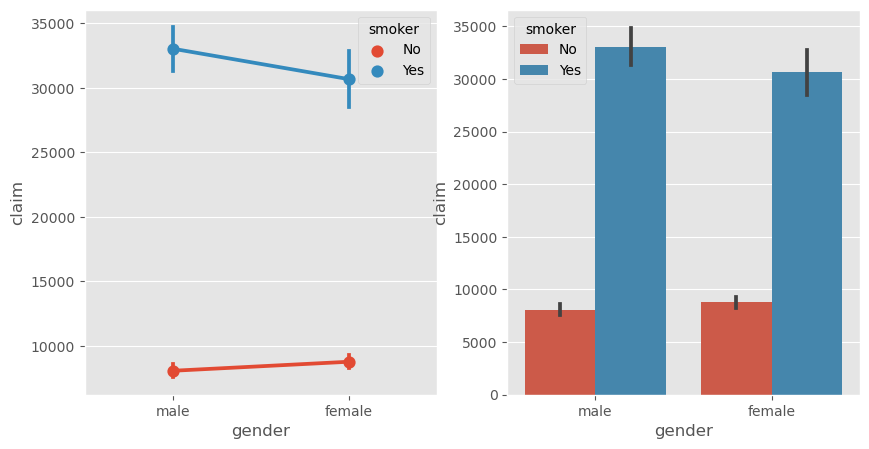

In [43]:
fig,ax = plt.subplots(1,2,figsize = (10,5))

sns.pointplot(insurance,x = 'gender',y = 'claim',hue = 'smoker',ax=ax[0])
sns.barplot(insurance,x = 'gender',y = 'claim',hue = 'smoker',ax=ax[1])


### **`Problem 8:`** Draw a reg plot between "age" and "bmi" columns.

<Axes: xlabel='age', ylabel='bmi'>

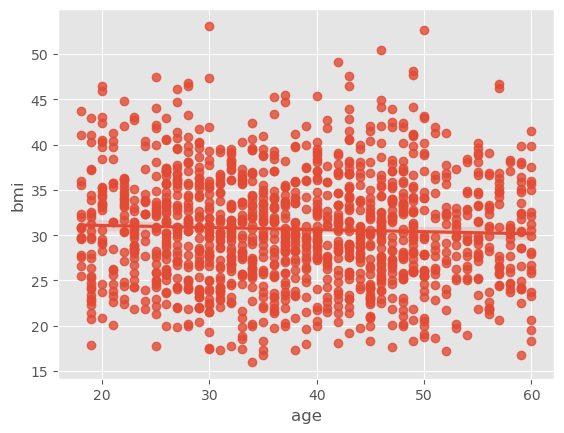

In [44]:
sns.regplot(insurance,x = 'age',y = 'bmi')

### **`Problem 9:`** Draw a pair plot of the insurance data. Use "gender" as hue parameter.

<Figure size 1000x1000 with 0 Axes>

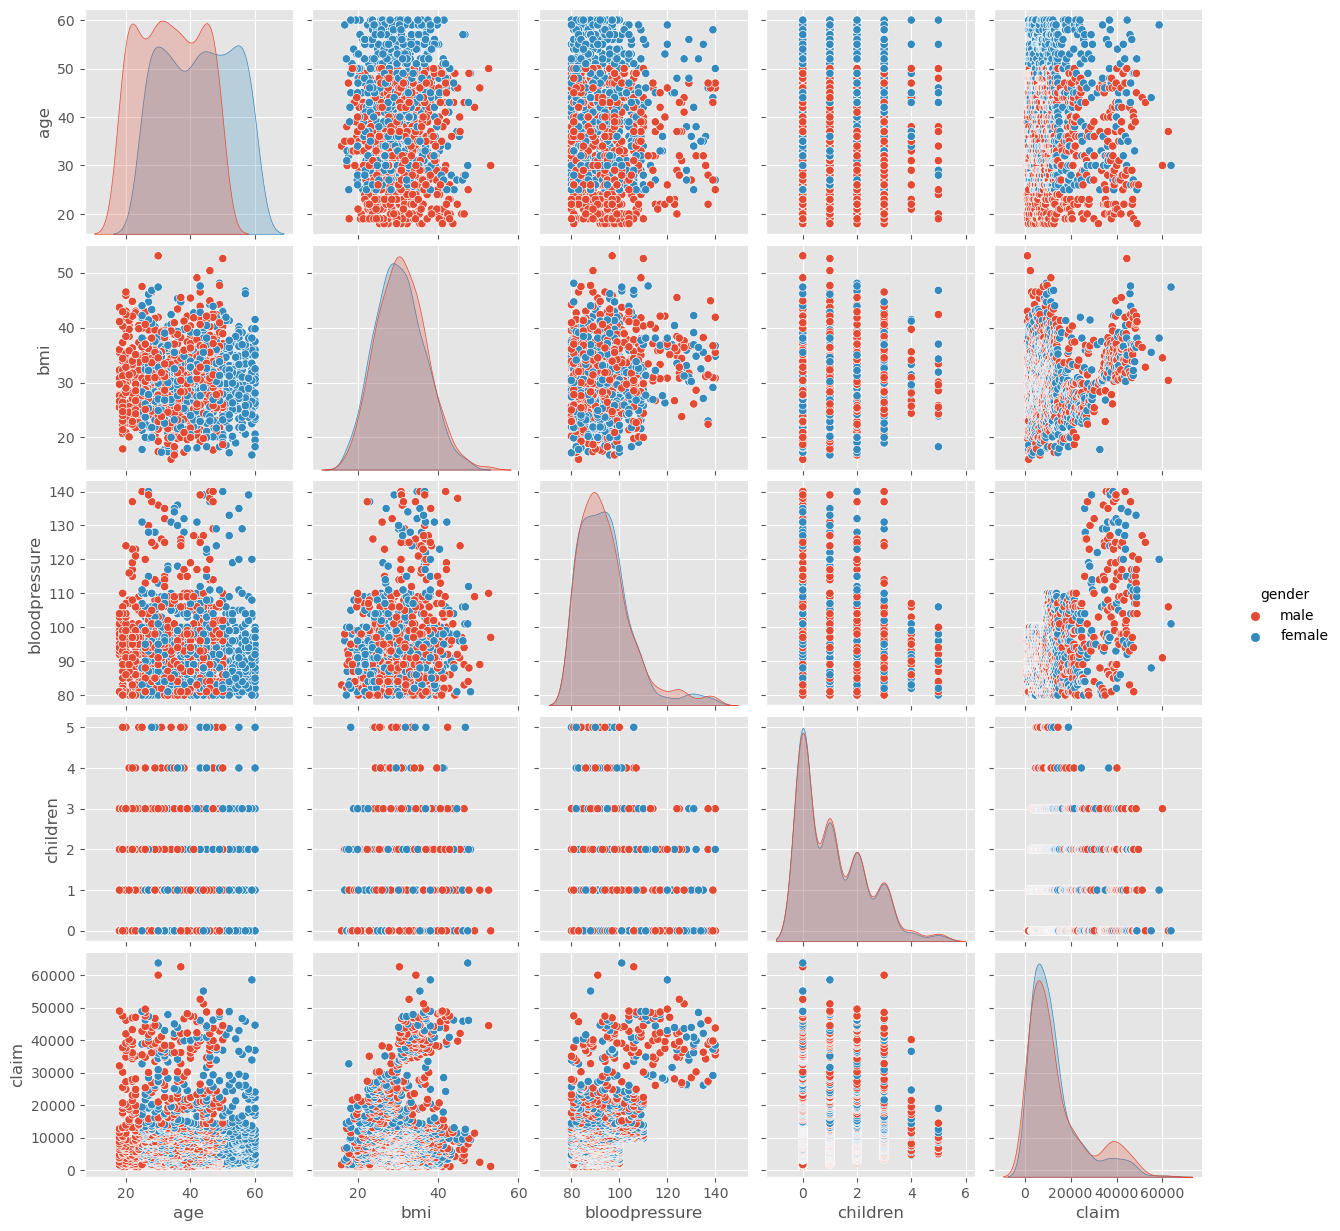

In [46]:
plt.figure(figsize=(10,10))
sns.pairplot(data = insurance.drop(columns=['PatientID','index']),hue = 'gender')

### **`Problem 10:`** Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

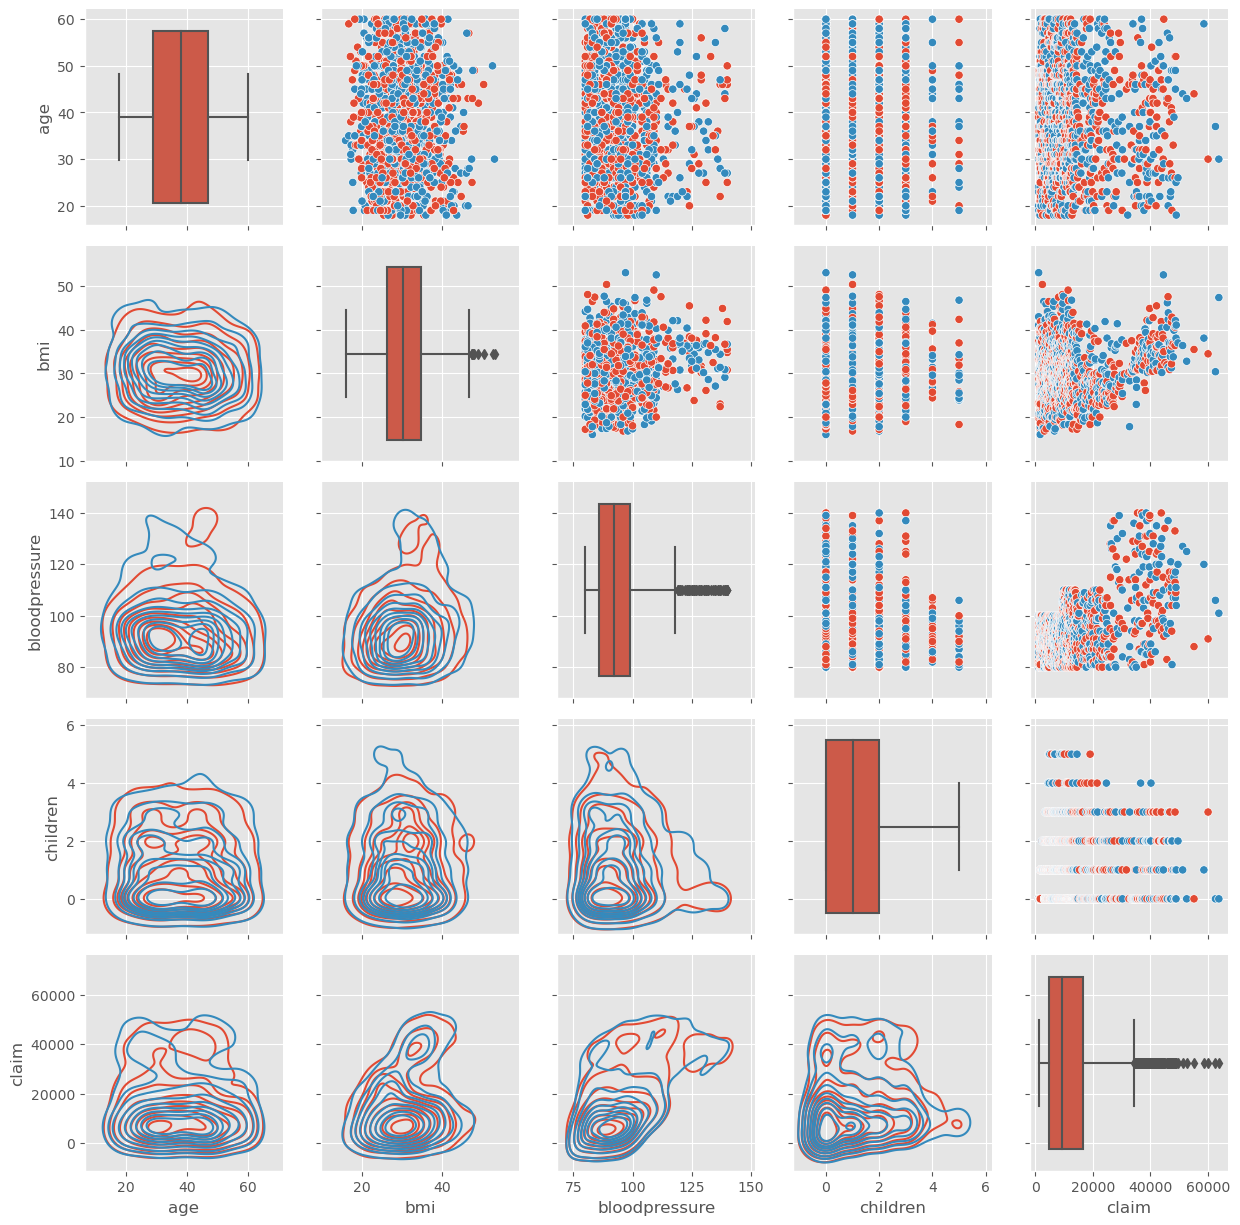

In [48]:
g = sns.PairGrid(data = insurance.drop(columns=['PatientID','index']),hue= 'diabetic')
g.map_diag(sns.boxplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

### **`Prolem 11:`** Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

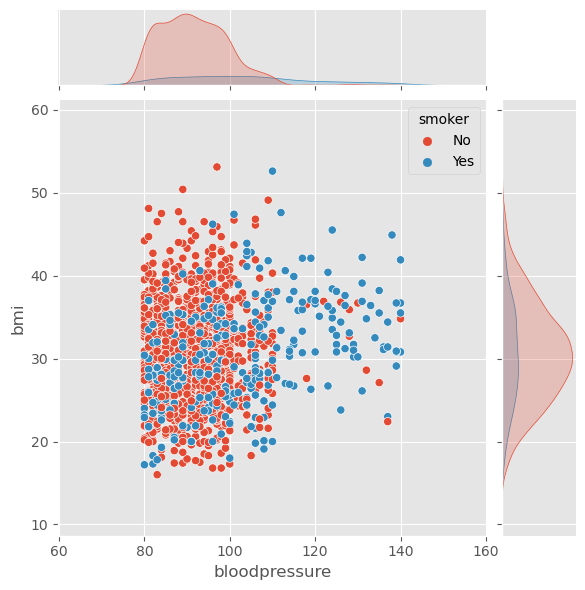

In [50]:
sns.jointplot(insurance,x = 'bloodpressure',y = 'bmi',hue = 'smoker')

### **`Problem 12:`** Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw a kdeplot at center and violin plot for individual variables

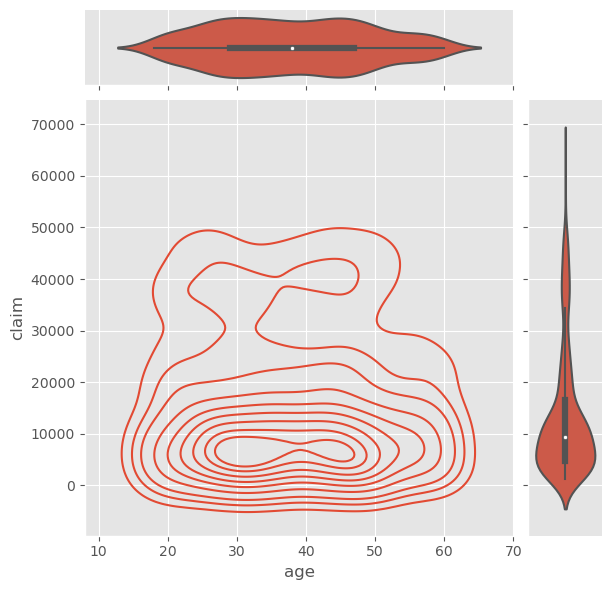

In [52]:
g = sns.JointGrid(insurance,x = 'age',y = 'claim')
g.plot(sns.kdeplot,sns.violinplot)